# Chicago CTA Ridership Analysis

MSCA 37010 - Programming for Analytics - Group Project <br>
Annabella Liang, Minh Vo

## Business Case
###### Executive Summary
- Chicago Transportation Authority (CTA) would like to evaluate how different weather conditions influence different bus routes and L-lines so that CTA can provide better service and cost-efficiency.
- This project will focus on analyzing the CTA ridership between 2018-2022. 


###### Project objectives

- Enable better and more stable services
- Improve cost efficiency
- Gain long-term development insights

###### Research focuses

- How weather conditions impact CTA ridership, and at which specific bus routes or L-lines.
- How pandemic shifted ridership, on volume and location

## Dataset Importing

In [4]:
#Importing the librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Bus and train data is retreived from *data.cityofchicago.org* <br>
Sources: <br>
https://data.cityofchicago.org/Transportation/CTA-Ridership-Bus-Routes-Daily-Totals-by-Route/jyb9-n7fm <br>
https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f

In [5]:
#Importing the CTA datasets
bus = pd.read_csv('busdata.csv')
train = pd.read_csv('traindata.csv')

#Reformat date column, from object to datetime
bus['date'] = pd.to_datetime(bus['date'])
train['date'] = pd.to_datetime(train['date'])


#This project will focus on analyzing the CTA ridership between 2018-2022.
#Filter data by date range of 2018 and 2022.
busdata = bus.loc[(bus['date'] >= '2018-07-31' ) & (bus['date'] <= '2022-07-31')]
traindata = train.loc[(train['date'] >= '2018-07-31' ) & (train['date'] <= '2022-07-31')]

#Import daily weather data in Chicago from 07/31/2018 to 07/31/2022
weather = pd.read_csv('weatherdata(Jul 18-22).csv')

In [6]:
busdata.head()

,route,date,daytype,rides
782349,1,2018-07-31,W,1679
782380,10,2018-07-31,W,720
782401,100,2018-07-31,W,512
782432,1001,2018-07-31,W,32
782463,103,2018-07-31,W,1806


In [7]:
traindata.head()

,station_id,stationname,date,daytype,rides
494,40020,Harlem-Lake,2022-06-26,U,1121
4496,40010,Austin-Forest Park,2018-11-01,W,2248
4497,40010,Austin-Forest Park,2018-11-02,W,1983
4498,40010,Austin-Forest Park,2018-11-03,A,837
4499,40010,Austin-Forest Park,2018-11-04,U,604


Daytypes are as follows:
- W=Weekday
- A=Saturday
- U=Sunday/Holiday

In [11]:
busdata.info()
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166992 entries, 782349 to 952780
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   route    166992 non-null  object        
 1   date     166992 non-null  datetime64[ns]
 2   daytype  166992 non-null  object        
 3   rides    166992 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200673 entries, 494 to 1042469
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   station_id   200673 non-null  int64         
 1   stationname  200673 non-null  object        
 2   date         200673 non-null  datetime64[ns]
 3   daytype      200673 non-null  object        
 4   rides        200673 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.2+ MB


Data source: https://www.visualcrossing.com/weather/weather-data-services
<br> <br>
Metrics chosen for analysis:
- Temperature (temp): F
- Precipitation (precip): mm
- Snow Depth (snowdepth): mm
- Wind Speed (windspeed): mph
- Visibility: miles

In [12]:
weather.head()

,name,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Chicago,7/31/2018,79.0,68.3,73.5,70.4,0.008,100,4.17,rain,...,6.1,3,NaN,2018-07-31T05:43:19,2018-07-31T20:09:53,0.56,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,Chicago,8/1/2018,83.8,63.6,74.2,66.6,0.029,100,8.33,rain,...,12.3,8,NaN,2018-08-01T05:44:18,2018-08-01T20:08:46,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2,Chicago,8/2/2018,85.0,70.3,77.6,63.6,0.009,100,8.33,rain,...,11.7,7,NaN,2018-08-02T05:45:18,2018-08-02T20:07:37,0.64,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,Chicago,8/3/2018,86.7,67.0,76.8,63.5,0.000,0,0.00,NaN,...,12.8,8,NaN,2018-08-03T05:46:18,2018-08-03T20:06:27,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,Chicago,8/4/2018,96.3,72.4,84.4,55.9,0.000,0,0.00,NaN,...,13.5,8,NaN,2018-08-04T05:47:19,2018-08-04T20:05:15,0.74,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [8]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1462 non-null   object        
 1   datetime          1462 non-null   datetime64[ns]
 2   tempmax           1462 non-null   float64       
 3   tempmin           1462 non-null   float64       
 4   temp              1462 non-null   float64       
 5   humidity          1462 non-null   float64       
 6   precip            1462 non-null   float64       
 7   precipprob        1462 non-null   int64         
 8   precipcover       1462 non-null   float64       
 9   preciptype        664 non-null    object        
 10  snow              1462 non-null   float64       
 11  snowdepth         1462 non-null   float64       
 12  windgust          1268 non-null   float64       
 13  windspeed         1462 non-null   float64       
 14  winddir           1462 n

In [14]:
#Check if CTA datasets have any missing values
busdata.isna().sum()

route      0
date       0
daytype    0
rides      0
dtype: int64

In [15]:
traindata.isna().sum()

station_id     0
stationname    0
date           0
daytype        0
rides          0
dtype: int64

In [9]:
#Add year, month-year columns to CTA datasets for further analysis
busdata['Year'] = busdata['date'].dt.year
busdata['Year-Month'] = busdata['date'].dt.to_period('M')

traindata['Year'] = traindata['date'].dt.year
traindata['Year-Month'] = traindata['date'].dt.to_period('M')

weather['Year'] = weather['datetime'].dt.year
weather['Year-Month'] = weather['datetime'].dt.to_period('M')

<ipython-input-9-a809ad8fdf09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busdata['Year'] = busdata['date'].dt.year
<ipython-input-9-a809ad8fdf09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busdata['Year-Month'] = busdata['date'].dt.to_period('M')
<ipython-input-9-a809ad8fdf09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

## Data Analysis and Visualization

In [10]:
#Create a table showing number of bus and train rides by daytype

bus_daytype = busdata.groupby(['daytype'])['rides'].sum().sort_values(ascending=False)
bus_daytype = bus_daytype.to_frame()
bus_daytype.loc[:,'rides'] = bus_daytype['rides'].map('{:,d}'.format)
bus_daytype = bus_daytype.rename(columns = {'rides': 'Total bus rides'})

train_daytype = traindata.groupby(['daytype'])['rides'].sum().sort_values(ascending=False)
train_daytype = train_daytype.to_frame()
train_daytype.loc[:,'rides'] = train_daytype['rides'].map('{:,d}'.format)
train_daytype = train_daytype.rename(columns = {'rides': 'Total train rides'})

rides_daytype = pd.concat([bus_daytype,train_daytype],axis=1)
rides_daytype

,Total bus rides,Total train rides
daytype,,
W,"527,267,620","340,576,297"
A,"68,055,356","42,730,206"
U,"56,131,715","35,999,042"


###    Ridership by Temperture

<ipython-input-18-efd27ed5ba7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busdata['Year-Month'] = busdata['Year-Month'].astype("string")
<ipython-input-18-efd27ed5ba7c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks().tolist()])


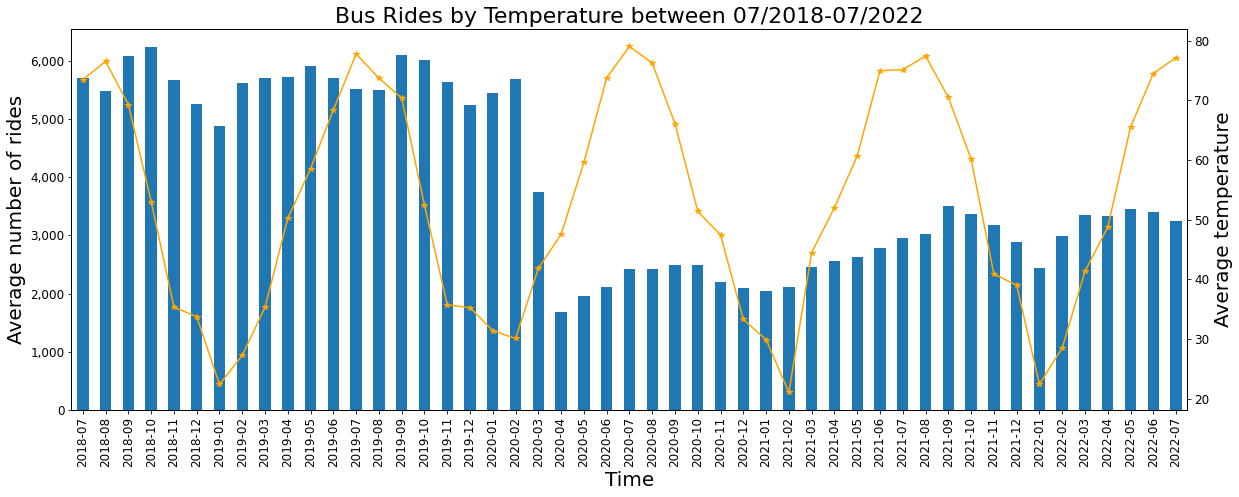

In [18]:
#Total bus rides by temperature between Jul 2018-Jul 2022
busdata['Year-Month'] = busdata['Year-Month'].astype("string") 
weather['Year-Month'] = weather['Year-Month'].astype("string") 

ax1 = busdata.groupby(['Year-Month'])['rides'].mean().plot(kind = 'bar', 
                                                           fontsize = 12,
                                                           figsize = (20,7))

ax1.set_title('Bus Rides by Temperature between 07/2018-07/2022',fontsize=22)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Average number of rides',fontsize=20)
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks().tolist()])

ax2 = ax1.twinx() #connect line plot with bar plot

ax2 = weather.groupby(['Year-Month'])['temp'].mean().plot(kind = 'line',
                                                    ax = ax2,
                                                    secondary_y = True,
                                                    marker = "*",
                                                    fontsize = 12,
                                                    color = 'orange')
ax2.set_ylabel('Average temperature',fontsize=20)

for i in ax1.get_xticklabels():
    i.set_rotation(90)

<ipython-input-19-4f48658a67c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata['Year-Month'] = traindata['Year-Month'].astype("string")
<ipython-input-19-4f48658a67c6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks().tolist()])


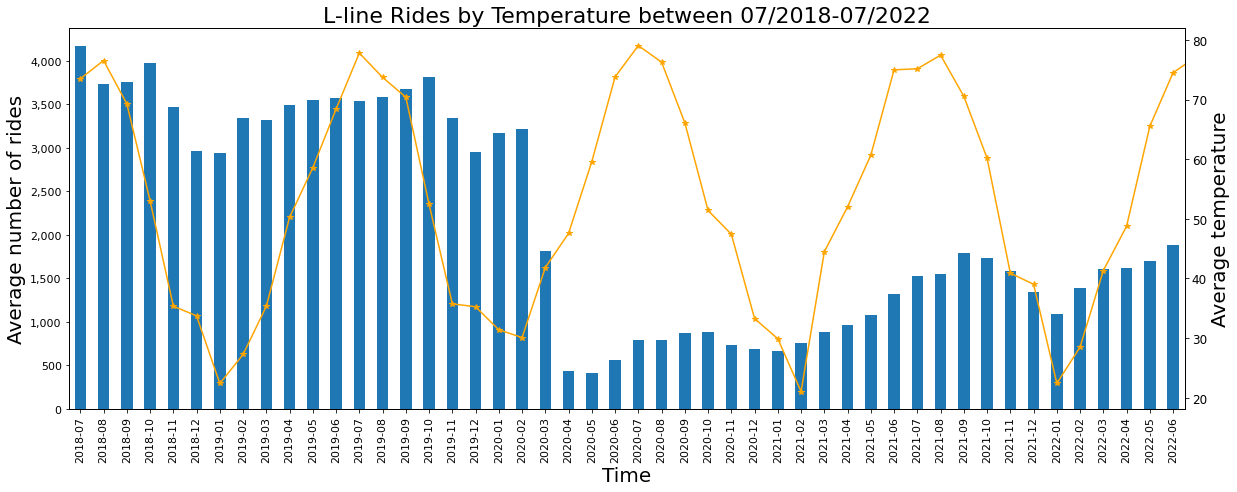

In [19]:
#Total L-line rides by temperature between Jul 2018-Jul 2022
    #convert period to string for plotting
traindata['Year-Month'] = traindata['Year-Month'].astype("string") 
weather['Year-Month'] = weather['Year-Month'].astype("string") 

ax1 = traindata.groupby(['Year-Month'])['rides'].mean().plot(kind = 'bar', 
                                                           fontsize = 11,
                                                           figsize = (20,7))

ax1.set_title('L-line Rides by Temperature between 07/2018-07/2022',fontsize=22)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Average number of rides',fontsize=20)
ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks().tolist()])

ax2 = ax1.twinx()

ax2 = weather.groupby(['Year-Month'])['temp'].mean().plot(kind = 'line',
                                                    ax = ax2,
                                                    secondary_y = True,
                                                    marker = "*",
                                                    fontsize = 12,
                                                    color = 'orange')
ax2.set_ylabel('Average temperature',fontsize=20)

for i in ax1.get_xticklabels():
    i.set_rotation(90)

- Temperature directly affects ridership: number of riders decreases in January yearly as the temperature drops.
<br>
- Both average bus rides and L-line rides started to decrease significantly since 04-2020 due to pandemic.
<br>
- Ridership started to increase slowly since 05-2021

In [11]:
#Select major the weather index that may impact ridership
weather_index = weather[['datetime', 'precip', 'temp', 'snowdepth', 'windspeed', 'visibility']]

#Join weather table with bus and train tables
busdata = busdata.rename(columns = {'date':'datetime'})
traindata = traindata.rename(columns = {'date':'datetime'})
weather_bus = pd.merge(weather_index, busdata, on = 'datetime', how = 'inner')
weather_bus = weather_bus.rename(columns = {'rides':'rides_b'})
weather_trans = pd.merge(weather_bus, traindata, on = ['datetime','daytype','Year','Year-Month'], how = 'inner')
weather_trans = weather_trans.rename(columns = {'rides':'rides_t'})
weather_trans.head()

,datetime,precip,temp,snowdepth,windspeed,visibility,route,daytype,rides_b,Year,Year-Month,station_id,stationname,rides_t
0,2018-07-31,0.008,73.5,0.0,11.6,9.9,1,W,1679,2018,2018-07,40010,Austin-Forest Park,1871
1,2018-07-31,0.008,73.5,0.0,11.6,9.9,1,W,1679,2018,2018-07,40020,Harlem-Lake,3981
2,2018-07-31,0.008,73.5,0.0,11.6,9.9,1,W,1679,2018,2018-07,40030,Pulaski-Lake,1390
3,2018-07-31,0.008,73.5,0.0,11.6,9.9,1,W,1679,2018,2018-07,40040,Quincy/Wells,8711
4,2018-07-31,0.008,73.5,0.0,11.6,9.9,1,W,1679,2018,2018-07,40050,Davis,3750


In [ ]:
weather_trans.info()

MemoryError: Unable to allocate 21.9 MiB for an array with shape (22916453,) and data type bool

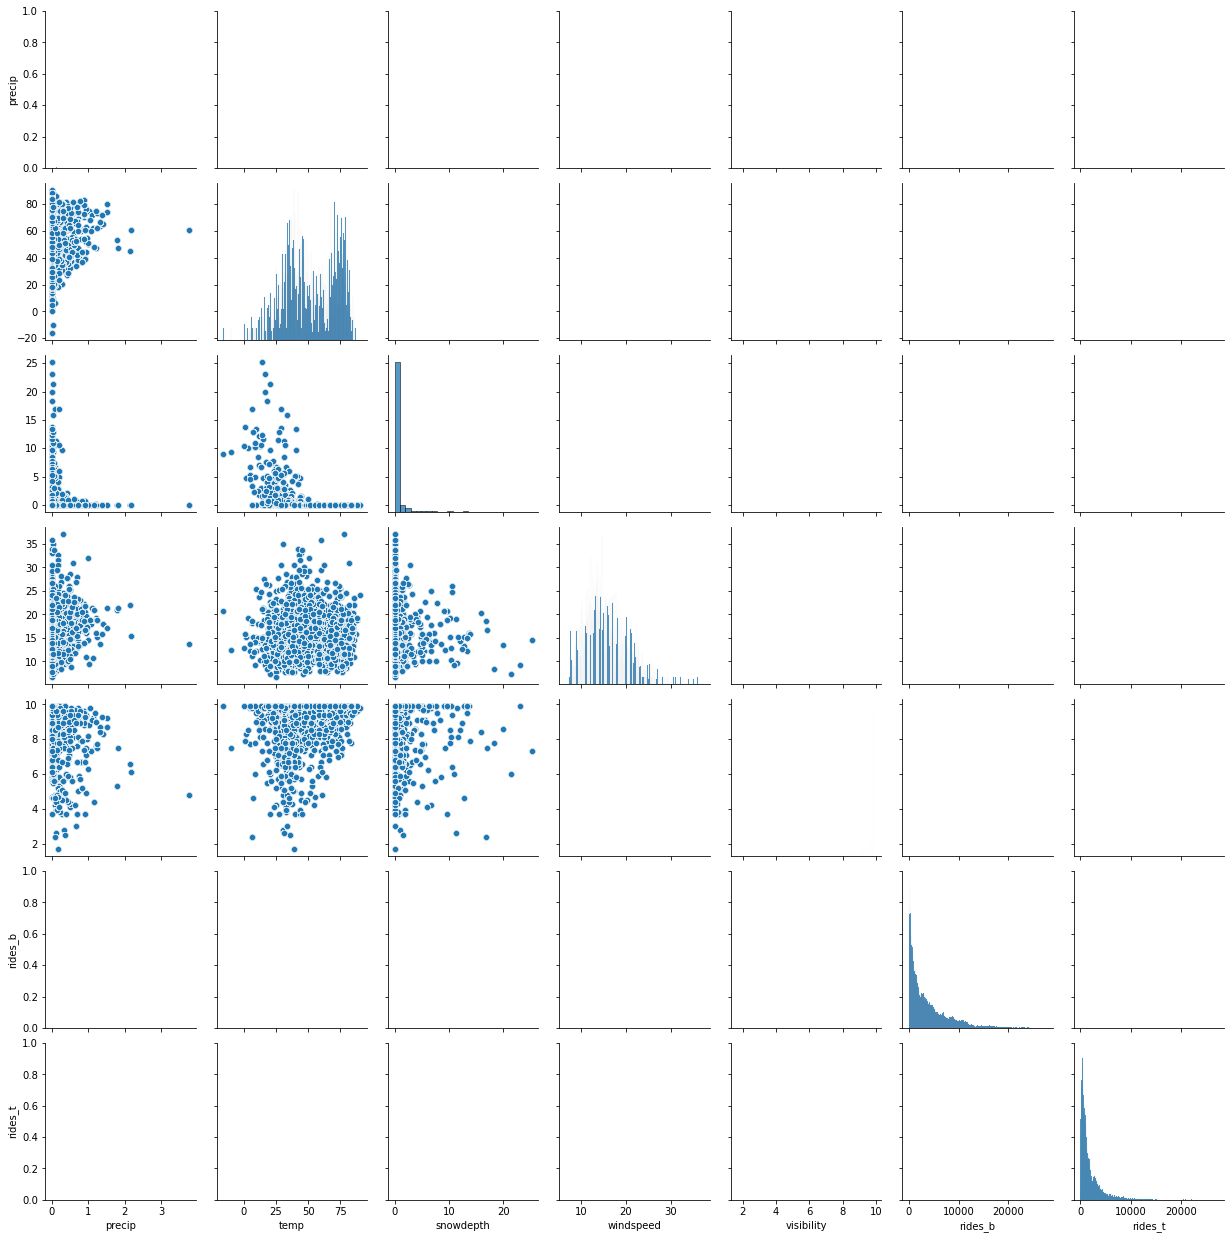

In [12]:
#Pair plot of weather on bus and train ridership
weather_trans_pp = weather_trans[['precip', 'temp', 'snowdepth', 'windspeed', 'visibility', 'rides_b', 'rides_t']]
sns.pairplot(weather_trans_pp)

In [7]:
# Select the top 10 stations with the highest riderships and visualize them on a heatmap
# to analyze how COVID impacts major public transportation in Chicago

station_ride = traindata.groupby(['stationname', 'Year']).agg({'rides':'mean'})
station_ride = pd.DataFrame(station_ride)
station_ride = station_ride.reset_index()
station_mean = station_ride.groupby(['stationname']).agg({'rides':'mean'})
station_mean.nlargest(10,'rides')

,rides
stationname,
Lake/State,10786.944343
Clark/Lake,9331.283784
Chicago/State,7787.551140
O'Hare Airport,7195.868880
Washington/Dearborn,6849.904948
Fullerton,6588.024124
Belmont-North Main,6561.862536
State/Lake,6509.186090
Roosevelt,6380.411049


In [13]:
station_ride_top10 = station_ride[station_ride['stationname'].isin(['Lake/State','Clark/Lake','Chicago/State',"O'Hare Airport",'Washington/Dearborn','Fullerton','Belmont-North Main','State/Lake','Roosevelt','Grand/State'])]

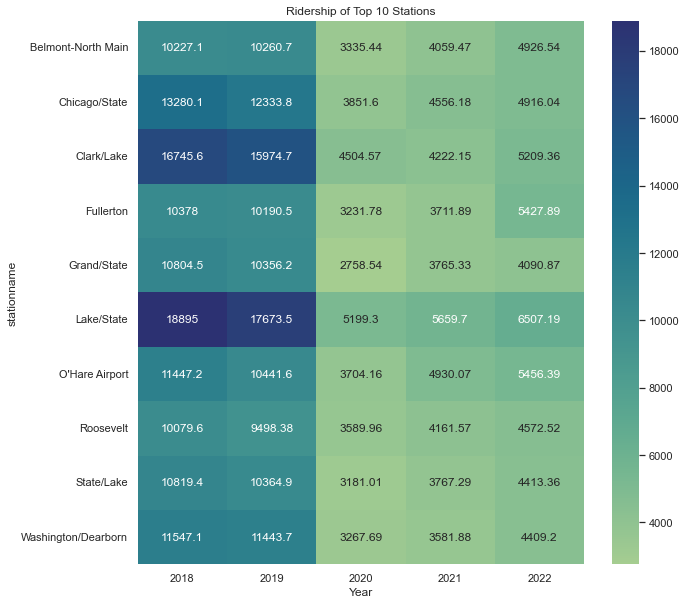

In [14]:
#Heatmap showing how ridership of the top 10 stations is impacted by pandemic 
sns.set()
station_ride_top10 = station_ride_top10.pivot('stationname','Year','rides')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(station_ride_top10, annot = True, cmap = 'crest', fmt = 'g', ax = ax)
plt.title('Ridership of Top 10 Stations')
plt.show()

- Riderships dropped by around ⅔ compared to pre-COVID during pandemic
- Riderships slightly picked up in 2022 when all COVID restrictions were lifted but far from pre-COVID level
- COVID has significantly changed how people commute in Chicago city and the impact could be permanent